In [11]:
%matplotlib inline

In [1]:
>>> from konlpy.corpus import kolaw
>>> c = kolaw.open('constitution.txt').read()
>>> print(c[:10])

대한민국헌법

유구


In [2]:
>>> from konlpy.corpus import kobill
>>> d = kobill.open('1809890.txt').read()
>>> print(d[:15])

지방공무원법 일부개정법률안



In [3]:
from konlpy.tag import Kkma
from konlpy.corpus import kolaw
from konlpy.utils import pprint
from nltk import collocations


measures = collocations.BigramAssocMeasures()
doc = kolaw.open('constitution.txt').read()

print('\nCollocations among tagged words:')
tagged_words = Kkma().pos(doc)
finder = collocations.BigramCollocationFinder.from_words(tagged_words)
pprint(finder.nbest(measures.pmi, 10)) # top 5 n-grams with highest PMI


Collocations among tagged words:
[(('가부', 'NNG'), ('동수', 'NNG')),
 (('강제', 'NNG'), ('노역', 'NNG')),
 (('경자', 'NNG'), ('유전', 'NNG')),
 (('고', 'ECS'), ('채취', 'NNG')),
 (('공무', 'NNG'), ('담임', 'NNG')),
 (('공중', 'NNG'), ('도덕', 'NNG')),
 (('과반', 'NNG'), ('수가', 'NNG')),
 (('교전', 'NNG'), ('상태', 'NNG')),
 (('그러', 'VV'), ('나', 'ECE')),
 (('기본적', 'NNG'), ('인권', 'NNG'))]


In [4]:
print('\nCollocations among words:')
words = [w for w, t in tagged_words]
ignored_words = [u'안녕']
finder = collocations.BigramCollocationFinder.from_words(words)
finder.apply_word_filter(lambda w: len(w) < 2 or w in ignored_words)
finder.apply_freq_filter(3) # only bigrams that appear 3+ times
pprint(finder.nbest(measures.pmi, 10))


Collocations among words:
[('현행', '범인'),
 ('형의', '선고'),
 ('내부', '규율'),
 ('정치적', '중립성'),
 ('누구', '든지'),
 ('회계', '연도'),
 ('지체', '없이'),
 ('평화적', '통일'),
 ('형사', '피고인'),
 ('지방', '자치')]


In [5]:
print('\nCollocations among tags:')
tags = [t for w, t in tagged_words]
finder = collocations.BigramCollocationFinder.from_words(tags)
pprint(finder.nbest(measures.pmi, 5))


Collocations among tags:
[('XR', 'XSA'), ('JKC', 'VCN'), ('EPT', 'EPT'), ('VCN', 'ECD'), ('ECD', 'VX')]


⊕ [Mining English and Korean text with Python — Courses](https://www.lucypark.kr/courses/2015-ba/text-mining.html#python-packages-for-text-mining-and-nlp)


In [6]:
from konlpy.corpus import kobill    # Docs from pokr.kr/bill
files_ko = kobill.fileids()         # Get file ids
doc_ko = kobill.open('1809890.txt').read()

In [7]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.morphs(doc_ko)

/Users/xiaofeiwu/miniconda3/envs/rasa/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [8]:
import nltk
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')   # For Python 2, input `name` as u'유니코드'

In [9]:
print(len(ko.tokens))       # returns number of tokens (document length)
print(len(set(ko.tokens)))  # returns number of unique tokens
ko.vocab()          

1777
476


FreqDist({'\n\n': 127, '.': 49, '의': 46, '육아휴직': 38, '을': 28, '(': 27, ')': 26, '이': 25, '자': 24, '에': 23, ...})

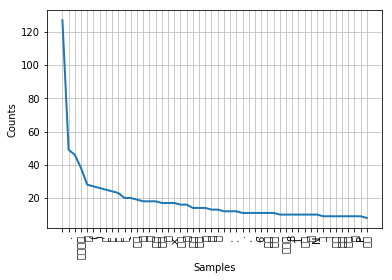

In [12]:
ko.plot(50)     # Plot sorted frequency of top 50 tokens


In [13]:
ko.count('초등학교')   # Counts occurrences


6

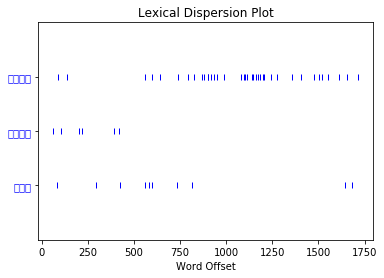

In [14]:
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])


In [17]:
from konlpy.tag import Twitter; t = Twitter()
tags_ko = t.pos("작고 노란 강아지가 페르시안 고양이에게 짖었다")
tags_ko

[('작고', 'Noun'),
 ('노란', 'Adjective'),
 ('강아지', 'Noun'),
 ('가', 'Josa'),
 ('페르시안', 'Noun'),
 ('고양이', 'Noun'),
 ('에게', 'Josa'),
 ('짖었다', 'Verb')]

In [19]:
from konlpy.corpus import kobill
docs_ko = [kobill.open(i).read() for i in kobill.fileids()]

In [21]:
from konlpy.tag import Twitter; t = Twitter()
pos = lambda d: ['/'.join(p) for p in t.pos(d, stem=True, norm=True)]
texts_ko = [pos(doc) for doc in docs_ko]
print(texts_ko[0][:5])

['행정절차법/Noun', '일부/Noun', '개정/Noun', '법률/Noun', '안/Noun']


In [1]:
from konlpy.tag import Mecab
mecab = Mecab()
print(mecab.morphs(u'영등포구청역에 있는 맛집 좀 알려주세요.'))

['영등포구청역', '에', '있', '는', '맛집', '좀', '알려', '주', '세요', '.']


```
We need pizza and spaghetti.
우리는 피자와 스파게티가 필요해요.
ulineun pijawa seupagetiga pil-yohaeyo.
```
```
0 -  우리는 (We are,  ulineun)
1 -  피자와 (Pizza and,  pijawa)
2 -  스파게티가 (Spaghetti,  seupagetiga)
3 -  필요해요 (I need,  pil-yohaeyo)
4 -  . (.,  .)
```

In [8]:
word='필요해요'
print(mecab.morphs(word))
print(mecab.nouns(word))
print(mecab.pos(word))

['필요', '해요']
['필요']
[('필요', 'NNG'), ('해요', 'XSA+EC')]


In [30]:
word='피자와 스파게티가'
def extract_ko(target, word):
    response = requests.post(f'http://localhost:1700/ko/extract/{target}', 
                             json={'sents':word})
    if response.status_code == 200:
        sets= response.json()
        return sets
    return []
rs=extract_ko('pos', word)
print(rs)
if rs:
    print(rs[0][0])

[['피자', 'NNG'], ['와', 'JC'], ['스파게티', 'NNG'], ['가', 'JKS']]
피자


In [33]:
fn=extract_ko
fn.__name__

'extract_ko'

In [18]:
import requests
from sagas.conf.conf import cf

def get_word_sets(word, lang='en', pos='*'):
    response = requests.post(f'{cf.ensure("words_servant")}/word_sets',
                             json={'word':word, 'lang':lang, 'pos':pos})
    # print(response.status_code, response.json())
    if response.status_code == 200:
        sets= response.json()
        if sets:
            return sets[0]
    return None

get_word_sets('word')

{'name': 'word.n.01',
 'definition': 'a unit of language that native speakers can identify',
 'examples': ['words are the blocks from which sentences are made',
  'he hardly said ten words all morning'],
 'domains': {'topic': [], 'region': [], 'usage': []},
 'lemmas': {'en': ['word'],
  'zh': ['单词', '字词', '词'],
  'ja': ['ワード', '単語', '言葉', '語', '辞'],
  'fr': ['mot'],
  'de': ['Wort'],
  'id': ['istilah', 'kata', 'perkataan'],
  'nl': ['woord']}}

In [21]:
from sagas.nlu.transliterations import translits
def translit(word):
    for w,p in mecab.pos(word):
        expl='_'
        if p in ('NNG', 'VV'):
            ws=get_word_sets(w, 'ko')
            if ws:
                expl=f"{ws['name']}({ws['definition']})"                
        print(w, translits.translit(w, 'ko'), p, expl)
translit('필요해요')

필요 pir-yo NNG necessary.a.01(absolutely essential)
해요 hae-yo XSA+EC _


In [22]:
word='피자와 스파게티가'
print(mecab.morphs(word))
print(mecab.nouns(word))
print(mecab.pos(word))

translit(word)

['피자', '와', '스파게티', '가']
['피자', '스파게티']
[('피자', 'NNG'), ('와', 'JC'), ('스파게티', 'NNG'), ('가', 'JKS')]
피자 pi-ja NNG pizza.n.01(Italian open pie made of thin bread dough spread with a spiced mixture of e.g. tomato sauce and cheese)
와 wa JC _
스파게티 seu-pa-ge-ti NNG spaghetti.n.02(pasta in the form of long strings)
가 ga JKS _


In [24]:
word='기다리'
print(mecab.morphs(word))
print(mecab.nouns(word))
print(mecab.pos(word))

translit(word)

['기다리']
[]
[('기다리', 'VV')]
기다리 gi-da-ri VV _


In [25]:
translit('단독입찰보다 복수입찰의 경우')

단독 dan-dog NNG _
입찰 ib-car NNG _
보다 bo-da JKB _
복수 bog-su NNG plural.a.01(composed of more than one member, set, or kind)
입찰 ib-car NNG _
의 eui JKG _
경우 gyeong-u NNG case.n.01(an occurrence of something)


In [3]:
>>> from konlpy.tag import Okt
>>> okt = Okt()
>>> print(okt.morphs(u'단독입찰보다 복수입찰의 경우'))

['단독', '입찰', '보다', '복수', '입찰', '의', '경우']


In [5]:
>>> print(okt.pos(u'이것도 되나욬ㅋㅋ', norm=True, stem=True))

[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되다', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]


In [13]:
word='필요해요'
print(okt.morphs(word))
print(okt.phrases(word))
print(okt.pos(word))
print(okt.pos(word, norm=True, stem=True))
print(okt.morphs(word))

['필요해요']
[]
[('필요해요', 'Adjective')]
[('필요하다', 'Adjective')]
['필요해요']


In [37]:
print(translits.translit('수호하', 'ko'),
      translits.translit('매수하', 'ko'),
      translits.translit('바퀴', 'ko'),
     )

su-ho-ha mae-su-ha ba-kwi
